In [2]:
import sys
import os
sys.path.append("/shared/home/wcarvalh/projects/sfgen/") # 
print("Started")

Started


In [3]:
from IPython.display import display, HTML

from sfgen.tools.tensorboard_data import TensorboardData
from sfgen.tools.tensorboard_vistool import Vistool


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
run_data = TensorboardData(
    search_paths=[],
    search_kwargs=dict(
        basepath="/shared/home/wcarvalh/projects/sfgen/data/local/",
#         split=['date','time', 'experiment', 'variant'],
        njobs=1,
        verbose=1,
    )
)
run_data.load_paths(
    search_paths=[
        "2021.01.23/*/*/*",
        "2021.01.24/*/*/*",
        "2021.01.27/*/*/*"
    ]
)
run_data.load_settings()


get_runs: /shared/home/wcarvalh/projects/sfgen/data/local/2021.01.24/*/*/*
get_runs: /shared/home/wcarvalh/projects/sfgen/data/local/2021.01.27/*/*/*
get_runs: /shared/home/wcarvalh/projects/sfgen/data/local/2021.01.23/*/*/*
loaded: 100%|██████████| 18/18 [00:00<00:00, 86679.07it/s]


/shared/home/wcarvalh/projects/sfgen/data/local/2021.01.24/*/*/*: 8
/shared/home/wcarvalh/projects/sfgen/data/local/2021.01.27/*/*/*: 2
/shared/home/wcarvalh/projects/sfgen/data/local/2021.01.23/*/*/*: 8


In [5]:
run_data.load_tensorboard(
    njobs=16,
    key_filter=lambda k: 'cumsteps' in k.lower() or 'average' in k.lower(),
#     load_paths=True
)

settings: 100%|██████████| 18/18 [00:34<00:00,  1.92s/it]


In [6]:
nonzero_key = run_data.keys_like('nonzeroreward')[0]
return_key = run_data.keys_like('return')[0]
length_key = run_data.keys_like('length')[0]
steps_key = run_data.keys_like('cumsteps')[0]
print(nonzero_key, return_key, length_key, steps_key)

NonzeroRewards/Average Return/Average Length/Average Diagnostics/CumSteps


In [7]:
vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=return_key,
    filter_key=nonzero_key,
    filter_column='mean',
    plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=[
            dict(
                key=nonzero_key,
                title="Average Success Rate",
                xlabel='Frames',
            ),
            dict(
                key=return_key,
                title="Return",
                xlabel='Frames',
            ),
            dict(
                key=length_key,
                title="Average Length",
                xlabel='Frames',
            )
    ],
    metadata_settings_list=['settings', 'date'],
    metadata_stats=['num_seeds', 'max', 'mean'],
    metadata_settings_dict={
        'settings' : {
            'config' : ['ppo_babyai']
        },
        'algo' : {
            'learning_rate' : [5e-5],
            'linear_lr_schedule' : [True, False],
        },
        'optim': {
            'weight_decay' : [0, 1e-5],
        },
        'env': {
            'level' : ["PutNextLocal"],
        },
        'level' : {
            'agent_view_size' : [7, 3],
        },
        'runner' : dict(
            n_steps=[1e8], # 50 million
        )
    }
)


,settings,date,settings:config,algo:learning_rate,algo:linear_lr_schedule,optim:weight_decay,env:level,level:agent_view_size,runner:n_steps,num_seeds,max,mean
9,"agent_view_size=7,config=ppo_babyai,learning_r...",2021.01.27,ppo_babyai,0.00005,False,0.00001,PutNextLocal,7,150000000.0,2,14.534276,5.258292
8,"agent_view_size=7,config=ppo_babyai,learning_r...",2021.01.27,ppo_babyai,0.00005,False,0.00000,PutNextLocal,7,150000000.0,2,15.545426,4.847934


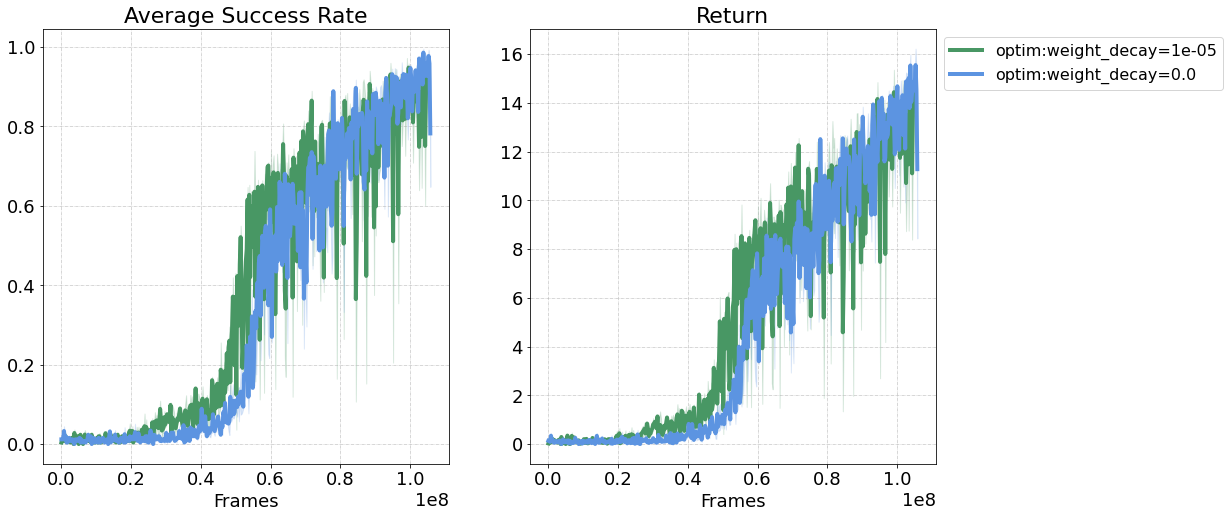

In [9]:
display(HTML(f"<h1>What's the effect of weight decay?</h1>"))        
vis_tool.plot_filters(
    topk=1,
#     legend_kwargs="none",
    data_filter_space=dict(
       optim=dict(weight_decay=[1e-5, 0]),
#         date=["2021.01.27"],
        )
)

,settings,date,settings:config,algo:learning_rate,algo:linear_lr_schedule,optim:weight_decay,env:level,level:agent_view_size,runner:n_steps,num_seeds,max,mean
1,"agent_view_size=3,config=ppo_babyai,learning_r...",2021.01.24,ppo_babyai,0.00005,False,0.00001,PutNextLocal,3,100000000.0,2,11.767506,7.183011
8,"agent_view_size=7,config=ppo_babyai,learning_r...",2021.01.27,ppo_babyai,0.00005,False,0.00000,PutNextLocal,7,150000000.0,2,15.545426,4.847934
3,"agent_view_size=3,config=ppo_babyai,learning_r...",2021.01.24,ppo_babyai,0.00005,True,0.00001,PutNextLocal,3,100000000.0,2,10.124647,5.258885
7,"agent_view_size=7,config=ppo_babyai,learning_r...",2021.01.24,ppo_babyai,0.00005,True,0.00001,PutNextLocal,7,100000000.0,2,11.942047,3.662349


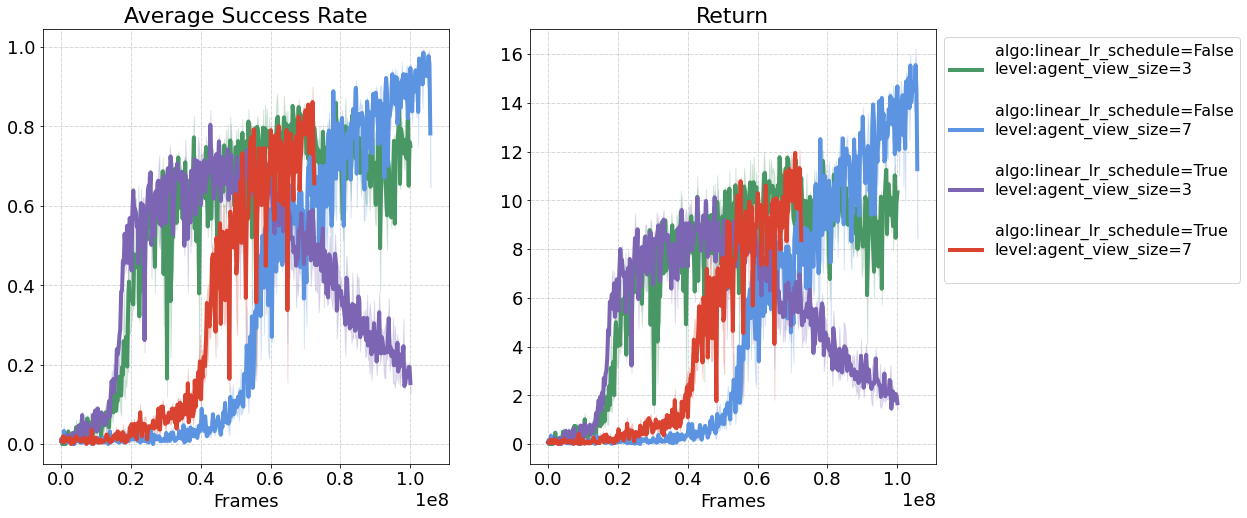

In [13]:
display(HTML(f"<h1>What effect does annealing the learning rate have?</h1>"))        
vis_tool.plot_filters(
    topk=1,
#     legend_kwargs="none",
    data_filter_space=dict(
        algo=dict(linear_lr_schedule=[False, True]),
        level=dict(agent_view_size=[
            3,
            7
        ]),
#         date=["2021.01.24", "2021.01.27"],
        )
)

No Matches for {'level:agent_view_size': 5}


,settings,date,settings:config,algo:learning_rate,algo:linear_lr_schedule,optim:weight_decay,env:level,level:agent_view_size,runner:n_steps,num_seeds,max,mean
0,"agent_view_size=3,config=ppo_babyai,learning_r...",2021.01.24,ppo_babyai,0.00005,False,0.00000,PutNextLocal,3,100000000.0,2,12.045123,7.258089
9,"agent_view_size=7,config=ppo_babyai,learning_r...",2021.01.27,ppo_babyai,0.00005,False,0.00001,PutNextLocal,7,150000000.0,2,14.534276,5.258292


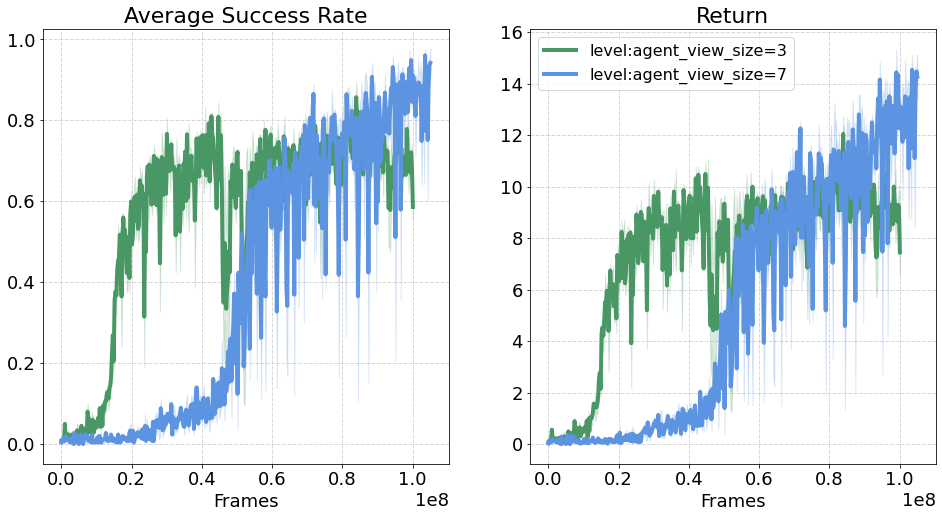

In [17]:
display(HTML(f"<h1>How was performance of different agent view sizes?</h1>"))        
vis_tool.plot_filters(
    topk=1,
    legend_kwargs="none",
    filter_column='mean',
    data_filters=[
        dict(level=dict(agent_view_size=3)),
        dict(level=dict(agent_view_size=5)),
        dict(level=dict(agent_view_size=7)),
    ]
)
